<img src="https://raw.githubusercontent.com/ourownstory/neural_prophet/02cbe0461453ef5d41d50808747609c892362bac/docs/source/images/np_highres_docs.svg" 
        alt="Picture" 
        width="800" 
        height="600" 
        style="display: block; margin: 0 auto" />

# Parameters

**Growth** - Growth specifically looks at trend, which the overall or global pattern observed. This particular parameter determine if piecewise linear (a & b) or nonlinear (c & d) growth occurs. 


**Note** - Nonlinear growth is currently not in our parameter selection. 
1. Does the trend grow?
2. Is the growth linear? 
3. Is the growth nonlinear? 

<img src="https://www.researchgate.net/profile/Anna-Agliari/publication/266160406/figure/fig4/AS:669376382521360@1536603174771/ncreasing-functions-piecewise-linear-and-nonlinear-smmoth.ppm" 
        alt="Picture" 
        width="800" 
        height="400" 
        style="display: block; margin: 0 auto" />

**Changepoints** - Specific points within the data, where change is known to occur. 

**Examples**: 
1. Increased spending during christmas sales
2. Electricity consumption during Winter
3. Number of people on hoildays during summer


<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsrep18893/MediaObjects/41598_2016_Article_BFsrep18893_Fig2_HTML.jpg?as=webp" 
        alt="Picture" 
        width="800" 
        height="400" 
        style="display: block; margin: 0 auto" />

**N Changepoints** - Potential, not specific, changepoints in trend.

**Changepoints Range** - The amount of training data considered to determine changepoints

**Trend Reg** - This is also known as smoothing. The degree of change that is allowed to occur at each changepoint. This is essentially L1, L2 or both regularisation.



**Trend Reg Threshold** - The degree of change that is allowed to occur before applying regularisation.

**Yearly Seasonality** - A recurring trend over multiple years.

<img src="https://machinelearningmastery.com/wp-content/uploads/2016/11/Minimum-Daily-Temperatures.png" 
        alt="Picture" 
        width="600" 
        height="600" 
        style="display: block; margin: 0 auto" />


**Weekly Seasonality** - A recurring trend over multiple weeks.

<img src="https://www.researchgate.net/profile/Tuerk-Dennis/publication/257947871/figure/fig4/AS:669959604695048@1536742225557/Weekly-seasonality-of-spikes-top-and-demeaned-log-loads-bottom-for-the-period.png" 
        alt="Picture" 
        width="600" 
        height="600" 
        style="display: block; margin: 0 auto" />


**Daily Seasonality** - A recurring trend over days weeks.

<img src="https://www.researchgate.net/publication/351342300/figure/fig5/AS:1019943474700288@1620184882587/Different-daily-seasonality-for-week-days-and-weekend.ppm" 
        alt="Picture" 
        width="700" 
        height="700" 
        style="display: block; margin: 0 auto" />


**Seasonality Mode** - The type of seasonality that is recurring.

<img src="https://miro.medium.com/max/564/1*LdeXlKrgNkFUjOhnO4Zzaw.jpeg" 
        alt="Picture" 
        width="600" 
        height="600" 
        style="display: block; margin: 0 auto" />

**Seasonality Reg** - Similar to trend reg, but specific to seasonality.

**N Lags** - Given the timeframe, the number data points to consider.

**Example**:
1. Timeframe - Every 5 minutes
2. Number of data points - 12
3. Result - 5 x 12 means the model takes into account the last hour to make a prediction i.e. the last 60 data points.

**AR Reg** - Similar to trend reg, but specific to the autoregression part of the model.

**N Forecasts** - The number of predictions to be made into the future. Similar to N Lags, but for the future not the past. 

**Example**:

1. Timeframe - Every 5 minutes
2. Number of data points - 12
3. Result - 5 x 12 means the model predicts 1 hour into the future i.e. 60 data points.

**Num Hidden Layers** - The number of hidden layers contained in the autoregression part of the model.

**D Hidden** - The number of neurons in each layer of the autoregressive part.

<img src="https://www.researchgate.net/profile/Mohamed-Zahran-16/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png" 
        alt="Picture" 
        width="600" 
        height="600" 
        style="display: block; margin: 0 auto" />

In [ ]:
learning_rate

**Loss Func** - The loss function used to train the model

**Normalize** - The type of normalisation to apply.

**Global Normalization** - Whether global or local normalisation is applied. Global normalisation refers to the entire dataset. Local normalisation refers to normalising the number of historical data points considered when making a prediction i.e. N Lags.

# Quick Example

Try changing paramters to see thier effects.

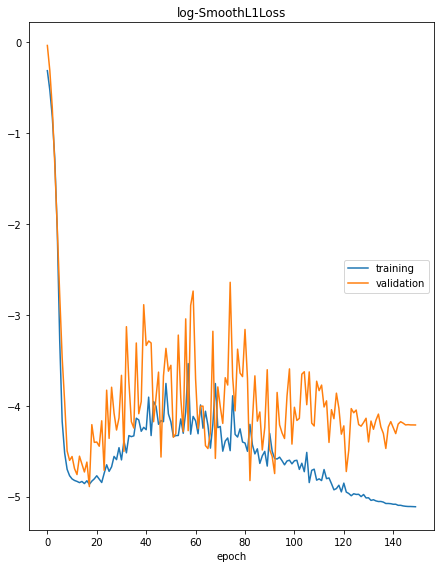

log-SmoothL1Loss
	training         	 (min:   -5.112, max:   -0.312, cur:   -5.112)
	validation       	 (min:   -4.890, max:   -0.035, cur:   -4.212)


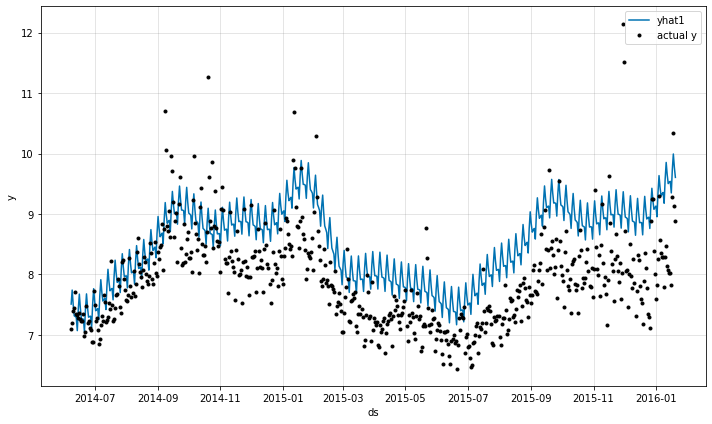

In [23]:
# Libraries
import pandas as pd
from neuralprophet import NeuralProphet
# Data
df = pd.read_csv("https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/wp_log_peyton_manning.csv")
# Model
model = NeuralProphet()
# Train-Test Split
df_train, df_test = model.split_df(df, valid_p=0.2)
# Training results
metrics = model.fit(df_train, validation_df=df_test, freq="D", progress = "plot")
# Predictions
forecast = model.predict(df=df_test)
# Plot Predictions
fig_forecast = model.plot(forecast)